## Desafío - Pruebas de hipótesis
### Camila Vera Villa - Miercoles 10 de julio

###  1. Evaluar juicios de hipótesis

#### A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible rechazar la hipótesis nula.

* 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. 
 
 El objetivo era medir actitudes frente a la adopción homoparentales. 
 La organización encargada de procesar los datos obtuvo los siguientes resultados:

    * El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.

    * Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    
    * Con un valor de prueba p = 11.83 y un puntaje de corte de 2.58(puntaje de confianza, debe compararse con el estadistico de contraste(Z)), ¿qué se debe concluir?

NOTA: 
Pregunta siguiente -anulada-
* Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal.

#### ¿Qué se puede decir sobre su estudio?

#### Evaluacion de juicios
* Respecto a la hipotesis de activistas LGTB:
No es posible rechazar la hipotesis nula, ya que que el valor de prueba p (11.83) es mucho mayor que el valor z.

* Respecto a la hipotesis de la Sociedad de Abstemios:
A mi parecer faltan muchos datos e informacion para poder emitir juicios adecuados respecto al estudio, por ejemplo, falta informacion respecto al tamano de la muestra, ya que no se puede saber si es representativa para una distribucion normal. No se especifica la cantidad de hombres y mujeres muestreados, tampoco la estratificacion de ella: rango etario, nivel socioeconomico, lugar de nacimieinto, escolaridad, residencia, entre otros.

### 2. Importe la base de datos utilizada la sesión presencial anterior

* Agrege una serie de variables binarias por cada continente de la variable region .

    * tip: Utilice np.where para ello.
    
* De manera similar a la sesión anterior, enfóquese en las siguientes variables:

    * Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life .
    * Apellidos desde la N hasta la Z: Enfocarse en las variables femlab , literacy y school .
    
#### Apellido: Vera. Enfoque en variables femlab , literacy y school .
   #### femlab : Tasa entre hombres y mujeres en el mercado laboral.
   #### literacy : Tasa de alfabetismo.
   #### school : Promedio años de escolaridad.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv('nations.csv', encoding = 'ISO-8859-1')
df.head(10)

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.00,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.20,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.20,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.20,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999
5,6,Cameroon,Africa,1986.800049,5.650000,127.800003,155.00,50.116665,18564118,56.366665,0.6532,NaN,0.75,NaN
6,7,Cape Verde,Africa,3052.199951,3.500000,81.599998,30.00,73.333336,484867,59.283333,0.6358,84.800003,2.15,NaN
7,8,Central African Rep,Africa,677.000000,3.383333,106.599998,173.50,45.933334,4203917,38.466667,0.8222,55.200001,0.20,NaN
8,9,Chad,Africa,1266.199951,1.500000,164.500000,209.00,48.566666,10509983,26.400000,0.8006,33.599998,0.10,NaN
9,10,Comoros,Africa,1099.000000,2.800000,58.000000,105.75,59.783333,688300,28.000000,0.8554,74.199997,0.40,NaN


In [3]:
#ONE HOT ENCODING: genera columna 'region_encoding' por region en el df.

for continente in df['region'].unique():
    df[continente+ '_' + 'region_encoding'] = (np.where(df['region'] == continente , 1, 0))



In [4]:
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,Africa_region_encoding,Americas_region_encoding,Asia_region_encoding,Europe_region_encoding,Oceania_region_encoding
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,1,0,0,0,0
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1,0,0,0,0
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1,0,0,0,0
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,1,0,0,0,0
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,1,0,0,0,0


### 3. Implemente una función de prueba de hipótesis a mano

* La función debe ingresar los siguientes argumentos:
    * df : La tabla de datos.
    * variable : La variable a analizar.
    * binarize : El indicador binario a utilizar.
    
* tips:
    * Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna() .
    * Implemente ttest_ind de scipy.stats y guarde el valor t y pval .
    * Reporte las medias para cada grupo (0 y 1).
    * Reporte la diferencia de entre las medias.
    * Reporte los valores t y p

In [6]:
df.school.mean()

7.459219855196933

In [10]:
stats.ttest_1samp(df.school.dropna(), popmean =7.459)

Ttest_1sampResult(statistic=0.0010185545291120518, pvalue=0.9991883969593943)

$$H_0: \mu = 7.459$$
$$H_0: \mu \neq 7.459$$

In [5]:
    #test de hipotesis para evaluar si dos medias son iguales
def hipotesis_prueba(df,variable,binarize):
    
    datos_1 = round(df[df[binarize].dropna() == 1][variable].mean(),2) #media de la region
    datos_2 = round(df[df[binarize].dropna() == 0][variable].mean(),2) #media del resto del mundo
    
        #prints
    print(f'___________   {binarize}   ___________')
    print(stats.ttest_ind(df.dropna().query(str(binarize) + "== 1")[variable], df.dropna().query(str(binarize) + "== 0")[variable]))
    print('La media de la región es:', datos_1)
    print('La media del resto del mundo es:', datos_2)
    print('La diferencia entre las medias es:', datos_1 - datos_2)

In [6]:
hipotesis_prueba(df,"literacy","Africa_region_encoding")

___________   Africa_region_encoding   ___________
Ttest_indResult(statistic=-8.930424901851616, pvalue=3.994247363088655e-13)
La media de la región es: 65.31
La media del resto del mundo es: 90.2
La diferencia entre las medias es: -24.89


#### Caso de prueba
- Hipotesis Nula: Las tasa de alfabetismo es similar entre los paises de Africa y el resto de las regiones.

- Hipotesis Alternativa: La tasa de alfabetismo en Africa, es distinta a la del resto del mundo.

#### Analisis
Mientras mas pequeno el  pvalue, mas fuerte es la evidencia de la muestra para rechazar la hipotesis nula. En este caso el pvalue es de 3.99, lo que indica que es alta, por lo que en promedio se espera que el resto del mundo presente mayores tasas de alfabetismo que Africa.


### 4. Implemente una función que grafique los histogramas para ambas muestras.

* Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la variable es 1 y 0, respectivamente.

    * tips: Refactorize la función incluyendo el método hist de matplotlib.pyplot .
    * Incluya los argumentos alpha y label .

* Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

In [7]:
def histo_binarizado(dataframe, variable, binarize):
    tmp1 = dataframe[dataframe[binarize] ==1][variable].dropna()
    tmp2 = dataframe[dataframe[binarize] ==0][variable].dropna()
    t,pvalue = stats.ttest_ind(tmp1,tmp2)
    
        #prints
    print(f'___________   {binarize}   ___________')
    print(f' - La media de la variable {variable} para la region {binarize} es igual a: {round(tmp1.mean(),1)}')
    print(f' - La media de la variable {variable} para todas las regiones menos {binarize} es igual a: {round(tmp2.mean(),1)}')
    print(f' - La diferencia entre ambas medias es: {round(abs(tmp1.mean()-tmp2.mean()),2)}')
    print(f' - Los valores t y p son {round(t,2)} y {round(pvalue,4)}, respectivamente.')
        #graficos
    plt.figure()
    plt.hist(tmp1, alpha=.5, color='darkturquoise',label=binarize)
    plt.axvline(np.mean(tmp1),color='darkturquoise')
    
    plt.title("{} - {}".format(variable,binarize))
    plt.hist(tmp2, alpha=.5, color='gold',label = 'Fuera de ' + binarize)
    plt.axvline(np.mean(tmp2),color='gold')
    
    plt.title("{} - No {}".format(variable,binarize))
    plt.legend()
    plt.show()
 

#### AFRICA

___________   Africa_region_encoding   ___________
 - La media de la variable femlab para la region Africa_region_encoding es igual a: 0.7
 - La media de la variable femlab para todas las regiones menos Africa_region_encoding es igual a: 0.7
 - La diferencia entre ambas medias es: 0.05
 - Los valores t y p son 1.78 y 0.0762, respectivamente.


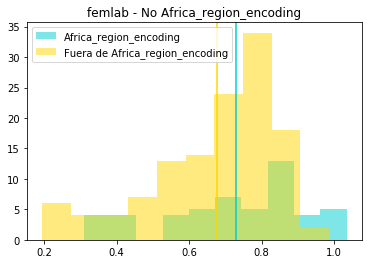

In [8]:
histo_binarizado(df, 'femlab','Africa_region_encoding') 

#### Conclusion
    El histograma da cuenta de forma grafica la diferencia entre las regiones y Africa respecto a las tasas entre hombres y mujeres en el mercado laboral. Considerando la superposicion de las barras y el valor cercano de las medias (ambas de 0.7), se podria aproximar a no rechazar la hipotesis nula.

___________   Africa_region_encoding   ___________
 - La media de la variable literacy para la region Africa_region_encoding es igual a: 65.3
 - La media de la variable literacy para todas las regiones menos Africa_region_encoding es igual a: 90.2
 - La diferencia entre ambas medias es: 24.89
 - Los valores t y p son -8.91 y 0.0, respectivamente.


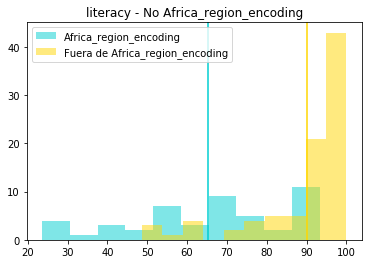

In [9]:
histo_binarizado(df, 'literacy','Africa_region_encoding')  

#### Conclusion
    El histograma da cuenta de forma grafica que las demas regiones presentan tasas de alfabetismo mucho mayores que Africa. Considerando la superposicion de las barras y el valor alejado de las medias y el pvalue de 0.0 se podria aproximar a rechazar la hipotesis nula.

___________   Africa_region_encoding   ___________
 - La media de la variable school para la region Africa_region_encoding es igual a: 4.5
 - La media de la variable school para todas las regiones menos Africa_region_encoding es igual a: 8.6
 - La diferencia entre ambas medias es: 4.03
 - Los valores t y p son -10.42 y 0.0, respectivamente.


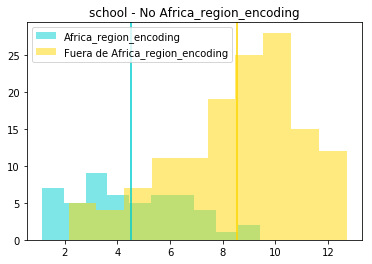

In [10]:
histo_binarizado(df, 'school','Africa_region_encoding')  

#### Conclusion
    El histograma da cuenta de forma grafica que las demas regiones del mundo presentan mayores anios de escolaridad que Africa. Considerando la superposicion de las barras y el valor alejado de las medias y el pvalue de 0.0 se podria aproximar a rechazar la hipotesis nula, lo cual se confirma con la prueba t-student de -10.42.

#### EUROPE

___________   Europe_region_encoding   ___________
 - La media de la variable femlab para la region Europe_region_encoding es igual a: 0.8
 - La media de la variable femlab para todas las regiones menos Europe_region_encoding es igual a: 0.7
 - La diferencia entre ambas medias es: 0.1
 - Los valores t y p son 3.06 y 0.0025, respectivamente.


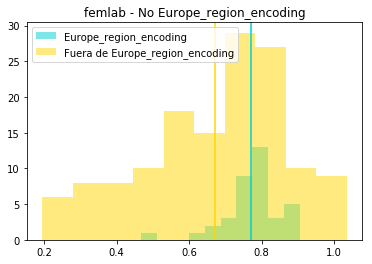

In [11]:
histo_binarizado(df, 'femlab','Europe_region_encoding') 

#### Conclusion
    El histograma da cuenta de forma grafica la diferencia entre las regiones del resto del mundo y Europa respecto a las tasas entre hombres y mujeres en el mercado laboral. Considerando la superposicion de las barras y  el valor de pvalue muy bajo (0.0025), se podria rechazar fuertemente la hipotesis nula.

___________   Europe_region_encoding   ___________
 - La media de la variable literacy para la region Europe_region_encoding es igual a: 98.2
 - La media de la variable literacy para todas las regiones menos Europe_region_encoding es igual a: 78.3
 - La diferencia entre ambas medias es: 19.88
 - Los valores t y p son 4.72 y 0.0, respectivamente.


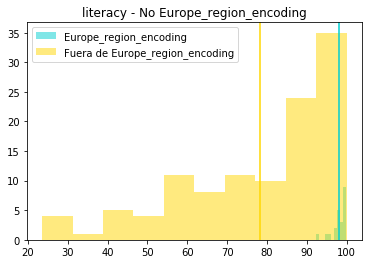

In [12]:
histo_binarizado(df, 'literacy','Europe_region_encoding') 

#### Conclusion
    El histograma da cuenta de forma grafica que las demas regiones presentan tasas de alfabetismo mucho menores que Europa. Considerando la superposicion de las barras y el valor alejado de las medias y el pvalue de 0.0 se podria aproximar a rechazar la hipotesis nula.

___________   Europe_region_encoding   ___________
 - La media de la variable school para la region Europe_region_encoding es igual a: 10.4
 - La media de la variable school para todas las regiones menos Europe_region_encoding es igual a: 6.6
 - La diferencia entre ambas medias es: 3.79
 - Los valores t y p son 8.52 y 0.0, respectivamente.


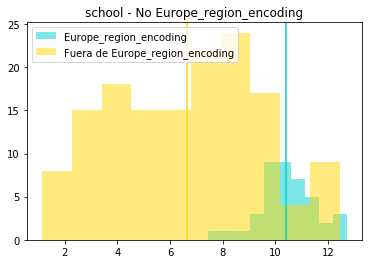

In [13]:
histo_binarizado(df, 'school','Europe_region_encoding') 

#### Conclusion
    El histograma da cuenta de forma grafica que las demas regiones del mundo presentan menores anios de escolaridad que Europa. Europa presenta una media de anios de 10.4, mientras que las demas regiones 6.6.El valor alejado de las medias y el pvalue de 0.0 se podria aproximar a rechazar la hipotesis nula, lo cual se confirma con la prueba t-student de 8.52